In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')


In [2]:
#Data reading 
Phy_Che = pd.read_csv('/Users/lidiayung/PhD_project/project_PONDERFUL/ponderful_DATA/ponderful_DATA_random_forest/PhyChe_XY.csv',index_col=0)
display(Phy_Che)


,Pond_ID,PondCode,X,Y,Pondscape,Country,Strat_Survey,Resampling,season_col,pH,...,Depth.t,Animals_cont.t,Hydeoperiod_length.t,ECELS.t,Natural_5.t,Aquatic_500.t,Cropland_500.t,Forest_500.t,Pastures.and.open.nature_500.t,Urban_500.t
1,BE048,AW1_NA1,5.032370,51.327590,Antwerp,Belgium,1,0,Spring,6.355,...,-0.667948,0.390951,0.487558,-0.103112,-1.354013,-0.635657,-0.402250,0.910612,-0.067940,-0.654950
2,BE049,AW1_IN2,5.002750,51.329040,Antwerp,Belgium,1,0,Spring,6.305,...,-0.542462,0.390951,0.487558,1.407024,-0.152667,0.849086,-0.459558,1.063622,-0.346234,0.579132
3,BE050,AW1_EX1,5.032560,51.362150,Antwerp,Belgium,1,0,Spring,6.005,...,-0.864160,0.390951,0.487558,0.764710,0.057716,-0.635657,0.357345,0.357345,-0.036563,-0.183805
4,BE051,AW1_NA2,4.922010,51.358100,Antwerp,Belgium,1,0,Spring,7.195,...,-1.082193,0.390951,0.487558,0.539746,-1.753607,1.120502,-0.152026,0.413601,0.459558,0.078412
5,BE052,AW1_IN1,5.016750,51.343080,Antwerp,Belgium,1,0,Spring,5.900,...,-1.140287,0.390951,0.487558,2.254661,-0.308999,-0.635657,-0.026114,0.269558,0.591528,-0.554602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,URG026,VCL2,-54.749753,-34.383481,Valle del Cordillera,Uruguay,1,1,Spring,7.880,...,0.390951,0.942702,0.487558,NaN,-1.753607,-0.635657,-1.731664,-0.776422,1.665398,-1.150349
237,URG027,VCL3,-54.747753,-34.384983,Valle del Cordillera,Uruguay,1,1,Spring,7.800,...,0.109886,0.942702,0.487558,NaN,-1.354013,-0.635657,-1.731664,-0.194437,1.343325,-1.150349
238,URG028,VCH1,-54.759703,-34.383453,Valle del Cordillera,Uruguay,1,1,Spring,9.610,...,0.291285,1.454408,0.487558,NaN,-1.753607,-0.635657,-0.335166,-1.181259,1.369531,-0.390951
239,URG029,VCH2,-54.767964,-34.379486,Valle del Cordillera,Uruguay,1,1,Spring,8.470,...,-0.335166,1.454408,0.487558,NaN,-1.753607,-0.635657,-0.324138,-0.604016,1.140287,-1.150349


In [3]:
vars=['Pond_ID', 'PondCode', 'Pondscape', 'Country', 'Strat_Survey',
       'Resampling', 'season_col','Area', 'Depth','TN', 'TP','bio1', 'bio4', 'bio5','bio12','Hydeoperiod_length',
       'Animals_cont', 'Natural_5','Aquatic_500', 'Cropland_500', 'Forest_500',
       'Pastures.and.open.nature_500','Urban_500',]
Phy_Che_random_forest_df = Phy_Che[vars]
display(Phy_Che_random_forest_df)

,Pond_ID,PondCode,Pondscape,Country,Strat_Survey,Resampling,season_col,Area,Depth,TN,...,bio5,bio12,Hydeoperiod_length,Animals_cont,Natural_5,Aquatic_500,Cropland_500,Forest_500,Pastures.and.open.nature_500,Urban_500
1,BE048,AW1_NA1,Antwerp,Belgium,1,0,Spring,702.000,50.00,1.30,...,23.514313,867.2400,12.0,2,2.0,0.000000,0.087143,0.638828,0.273897,0.000132
2,BE049,AW1_IN2,Antwerp,Belgium,1,0,Spring,336.000,56.88,3.20,...,23.489197,867.2400,12.0,2,70.0,0.006009,0.075277,0.711569,0.192221,0.014923
3,BE050,AW1_EX1,Antwerp,Belgium,1,0,Spring,882.000,38.57,1.85,...,23.488373,867.2400,12.0,2,80.0,0.000000,0.378715,0.341746,0.277891,0.001647
4,BE051,AW1_NA2,Antwerp,Belgium,1,0,Spring,180.000,32.50,3.60,...,23.399719,870.3936,12.0,2,0.0,0.027829,0.170470,0.353205,0.443551,0.004946
5,BE052,AW1_IN1,Antwerp,Belgium,1,0,Spring,4250.000,28.50,2.65,...,23.494171,867.2400,12.0,2,57.0,0.000000,0.208907,0.300152,0.490612,0.000329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,URG026,VCL2,Valle del Cordillera,Uruguay,1,1,Spring,310.235,107.00,0.58,...,27.547333,1198.3680,12.0,3,0.0,0.000000,0.000000,0.072353,0.927647,0.000000
237,URG027,VCL3,Valle del Cordillera,Uruguay,1,1,Spring,84.830,91.00,0.56,...,27.547333,1198.3680,12.0,3,2.0,0.000000,0.000000,0.150056,0.849944,0.000000
238,URG028,VCH1,Valle del Cordillera,Uruguay,1,1,Spring,2591.940,101.00,2.00,...,27.547333,1198.3680,12.0,4,0.0,0.000000,0.119596,0.028243,0.851552,0.000610
239,URG029,VCH2,Valle del Cordillera,Uruguay,1,1,Spring,362.905,67.50,1.05,...,27.547333,1198.3680,12.0,4,0.0,0.000000,0.124294,0.089898,0.785807,0.000000


In [4]:
#UK lancaster has NA values for both TP and TP
Phy_Che_random_forest_df.dropna(inplace=True)

In [5]:
# Split the data into features (X) and target (y)
X = Phy_Che_random_forest_df[['Area', 'Depth','bio1', 'bio4', 'bio5','bio12','Hydeoperiod_length',
       'Animals_cont', 'Natural_5','Aquatic_500', 'Cropland_500', 'Forest_500',
       'Pastures.and.open.nature_500','Urban_500']]

y = Phy_Che_random_forest_df['TP']


In [6]:

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

### Fitting and evaluating the model

In [7]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = regressor.predict(X)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')


Out-of-Bag Score: -0.25316175878253855
Mean Squared Error: 0.04238957878223915
R-squared: 0.8318116976908942


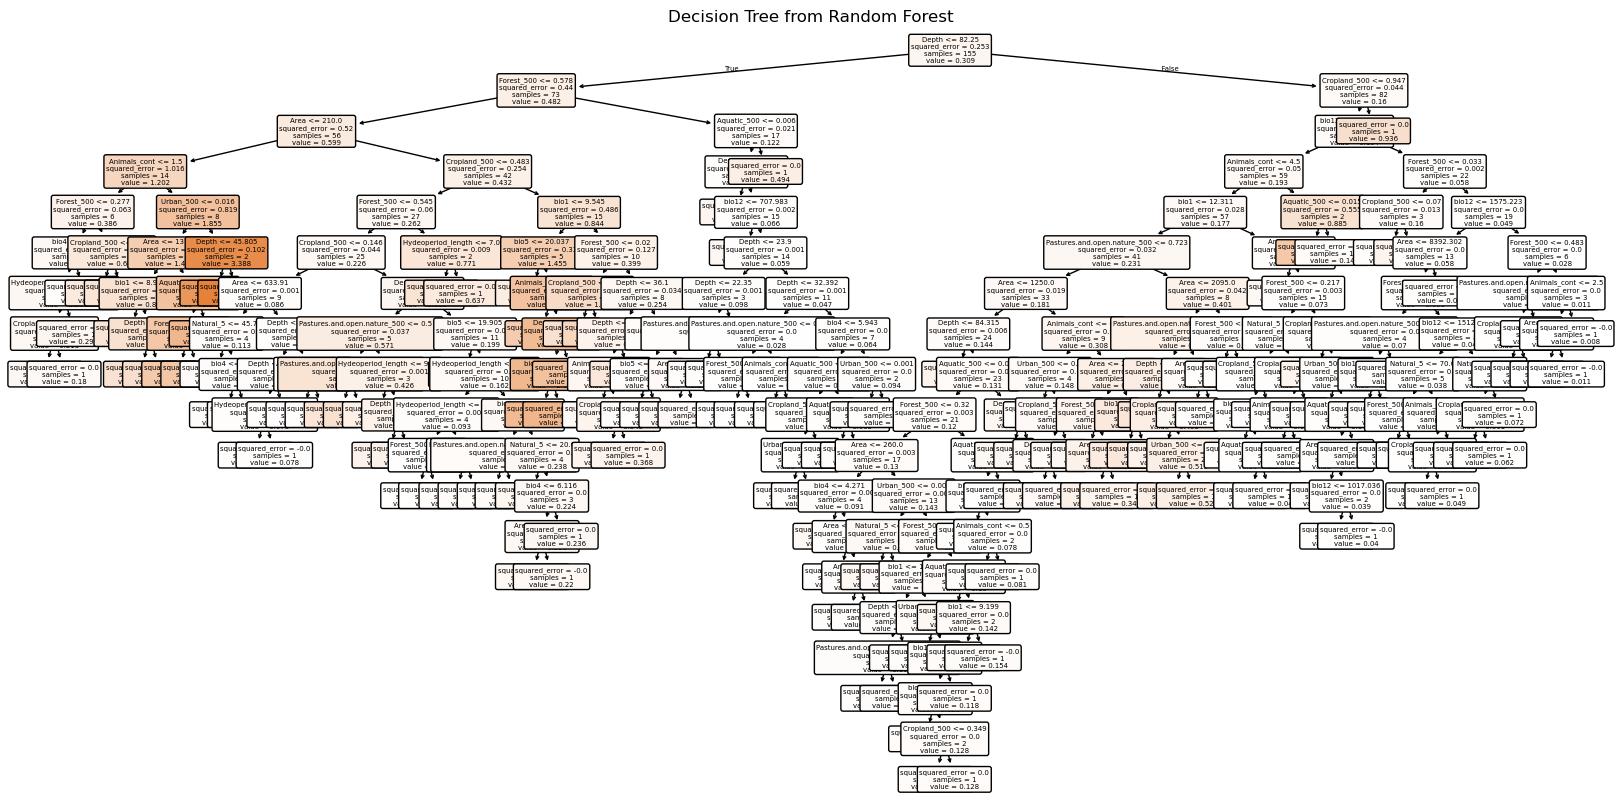

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=5)
plt.title("Decision Tree from Random Forest")
plt.show()


### TN tree

In [9]:
# Split the data into features (X) and target (y)
X = Phy_Che_random_forest_df[['Area', 'Depth','bio1', 'bio4', 'bio5','bio12','Hydeoperiod_length',
       'Animals_cont', 'Natural_5','Aquatic_500', 'Cropland_500', 'Forest_500',
       'Pastures.and.open.nature_500','Urban_500']]

y = Phy_Che_random_forest_df['TN']


In [10]:

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

### Fitting and evaluating the model

In [11]:

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = regressor.predict(X)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')


Out-of-Bag Score: -0.07999568991199624
Mean Squared Error: 0.2557724594957983
R-squared: 0.8628010794105421


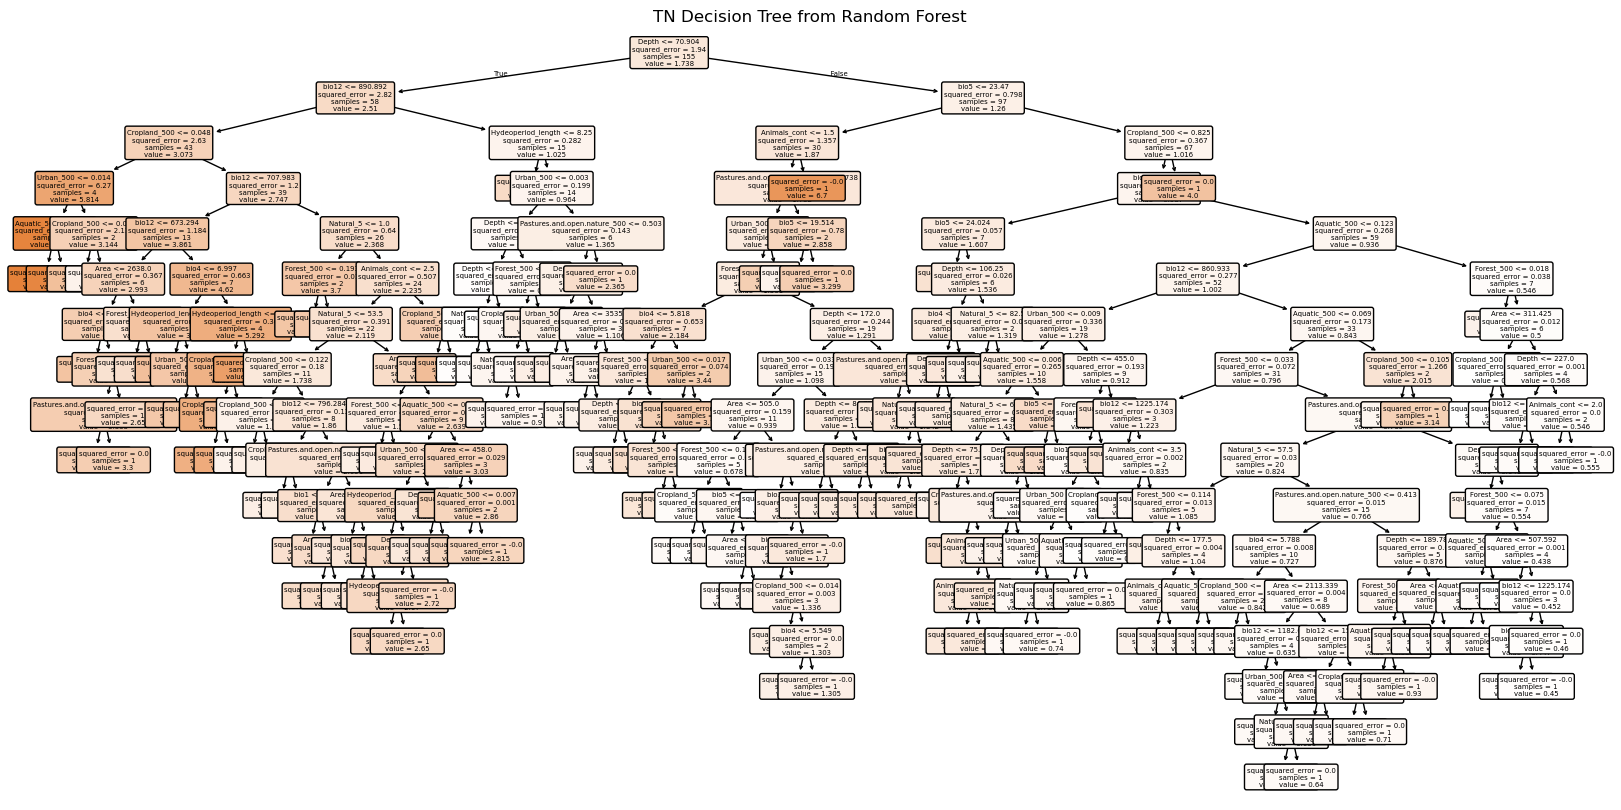

In [12]:

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=5)
plt.title("TN Decision Tree from Random Forest")
plt.show()
